<a href="https://colab.research.google.com/github/RajeshworM/AB_Tesing_Analysis/blob/main/AB_Test_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**A/B testing and analysis project**

In [10]:
import pandas as pd

# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/My Drive/marketing_data.csv')


In [11]:
# Display the first few rows of the dataset
df.head()


,Unnamed: 0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency


In [13]:
print(df.isnull().sum())


Unnamed: 0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64


In [14]:
df = df.dropna()  # Dropping rows with missing values
# or
df['most_ads_day'].fillna(df['most_ads_day'].mode()[0], inplace=True)  # Filling with the mode


<ipython-input-14-d622960077ce>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['most_ads_day'].fillna(df['most_ads_day'].mode()[0], inplace=True)  # Filling with the mode


In [15]:
df['user_id'] = df['user_id'].astype(str)  # Ensuring user_id is a string
df['converted'] = df['converted'].astype(int)  # Ensuring converted is binary (0/1)


In [16]:
print(df.describe())
print(df['test_group'].value_counts())  # Checking distribution of A/B groups


          Unnamed: 0      converted      total_ads  most_ads_hour
count  588101.000000  588101.000000  588101.000000  588101.000000
mean   294050.000000       0.025239      24.820876      14.469061
std    169770.279667       0.156850      43.715181       4.834634
min         0.000000       0.000000       1.000000       0.000000
25%    147025.000000       0.000000       4.000000      11.000000
50%    294050.000000       0.000000      13.000000      14.000000
75%    441075.000000       0.000000      27.000000      18.000000
max    588100.000000       1.000000    2065.000000      23.000000
test_group
ad     564577
psa     23524
Name: count, dtype: int64


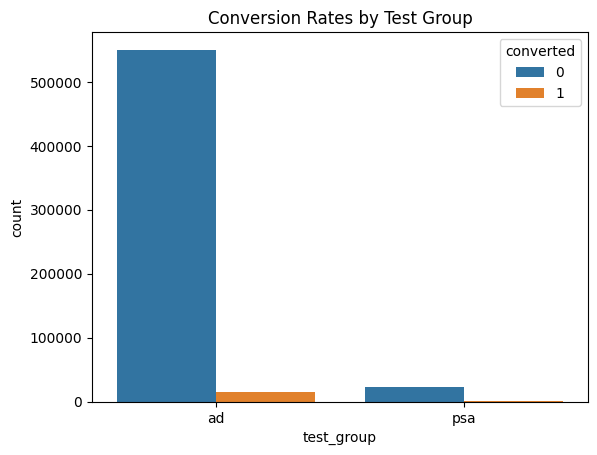

In [17]:
sns.countplot(x='test_group', hue='converted', data=df)
plt.title("Conversion Rates by Test Group")
plt.show()


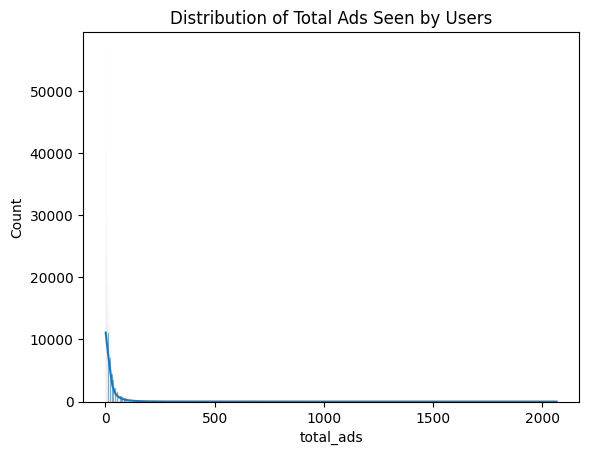

In [18]:
sns.histplot(df['total_ads'], kde=True)
plt.title("Distribution of Total Ads Seen by Users")
plt.show()


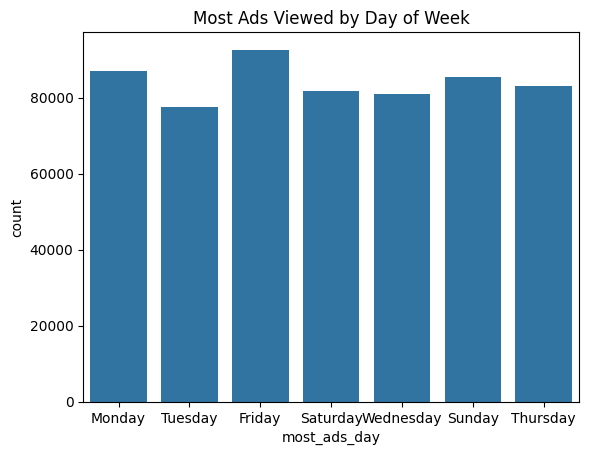

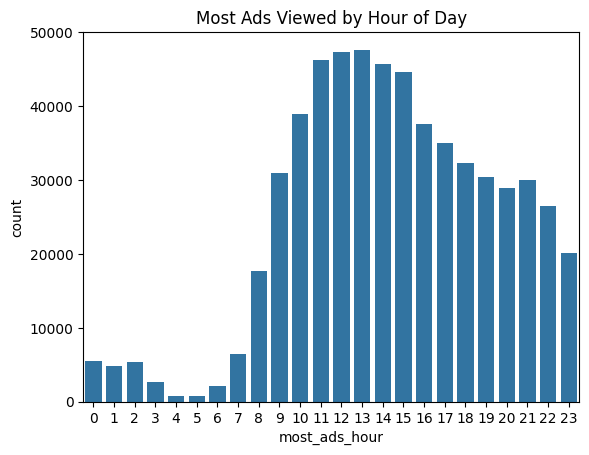

In [19]:
sns.countplot(x='most_ads_day', data=df)
plt.title("Most Ads Viewed by Day of Week")
plt.show()

sns.countplot(x='most_ads_hour', data=df)
plt.title("Most Ads Viewed by Hour of Day")
plt.show()


T-statistic: nan
P-value: nan
No significant difference between groups (fail to reject null hypothesis)


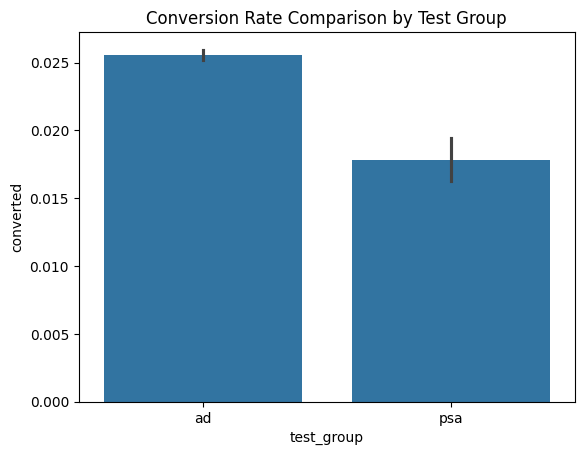

In [30]:
from scipy.stats import ttest_ind

# Separate the converted values by test group
group_A = df[df['test_group'] == 'A']['converted']
group_B = df[df['test_group'] == 'B']['converted']

# Perform an independent t-test
t_stat, p_val = ttest_ind(group_A, group_B)
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Interpretation
alpha = 0.05  # Significance level
if p_val < alpha:
    print("Significant difference between groups (reject null hypothesis)")
else:
    print("No significant difference between groups (fail to reject null hypothesis)")

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='test_group', y='converted', data=df, estimator=np.mean)
plt.title("Conversion Rate Comparison by Test Group")
plt.show()


In [31]:
# Calculate Cohen's d for effect size
cohen_d = (group_A.mean() - group_B.mean()) / np.sqrt((group_A.var() + group_B.var()) / 2)
print("Effect size (Cohen's d):", cohen_d)


Effect size (Cohen's d): nan


In [21]:
#Chi-Square Test for Conversion
conversion_table = pd.crosstab(df['test_group'], df['converted'])
chi2, p, dof, expected = chi2_contingency(conversion_table)
print("Chi-square test statistic:", chi2)
print("P-value:", p)
if p < 0.05:
    print("Significant difference in conversion rates between groups")
else:
    print("No significant difference in conversion rates between groups")


Chi-square test statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
Significant difference in conversion rates between groups


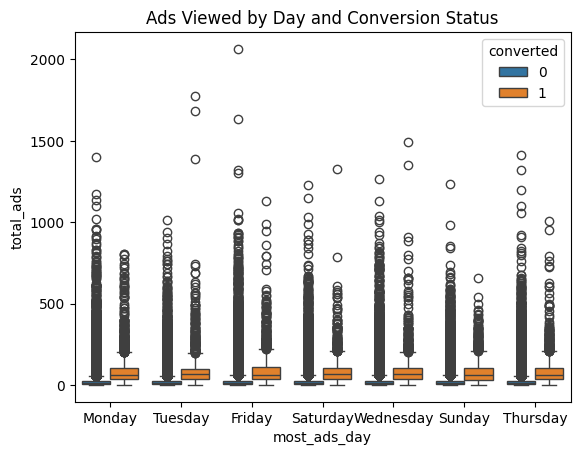

In [22]:
#Analysis by most_ads_day and most_ads_hour
sns.boxplot(x='most_ads_day', y='total_ads', hue='converted', data=df)
plt.title("Ads Viewed by Day and Conversion Status")
plt.show()


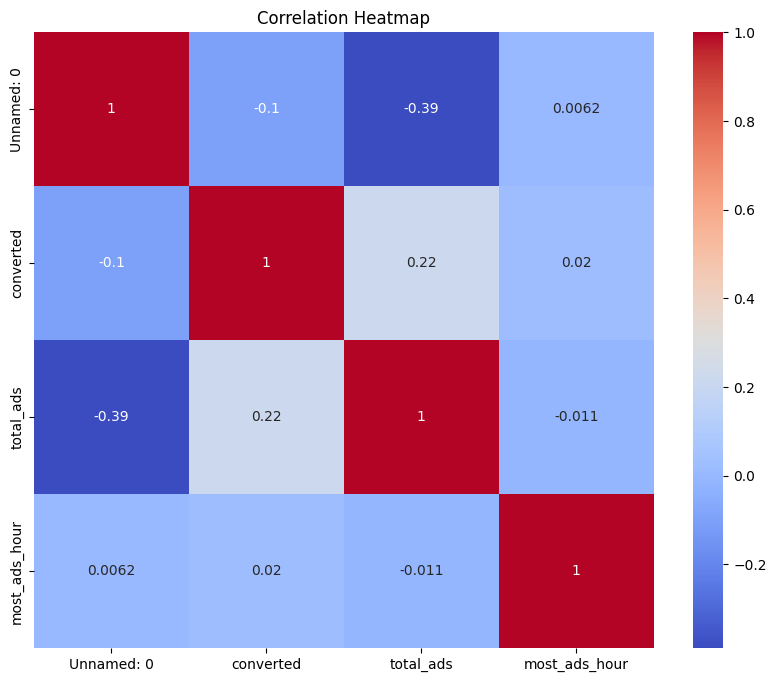

In [27]:
#Heatmap of Correlations
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])


# Heatmap of correlations among numeric columns
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



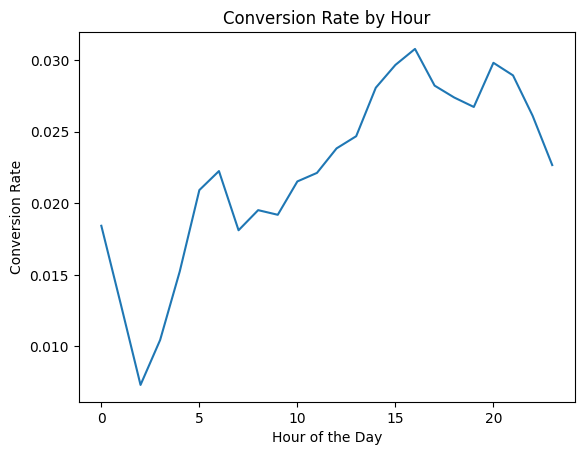

In [28]:
#Conversion Rates by Hour:
hour_conversion = df.groupby('most_ads_hour')['converted'].mean()
plt.plot(hour_conversion)
plt.title("Conversion Rate by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Conversion Rate")
plt.show()
